# Análisis de Ventas Globales

## PASO 2B - Análisis de Dataset "Sales 2013-14"
Por **Daniel Palacio** (github.com/palaciodaniel) - Noviembre 2021

In [1]:
import pandas as pd
import seaborn as sns

### Carga de dataset y características generales

Al cargar el dataset original, es evidente que algo salió mal y las columnas que debieran ser "integers" estaban siendo tratadas como "objects" ("strings"). Se usó el siguiente código para intentar forzarlas como "int"...

    df_sales201314["Cost"].astype("int")

... y el error que se obtuvo fue que existe un valor "-" que actúa como observación vacía. Lo mismo ocurrió con el resto de las columnas numéricas.

Dado que dichas columnas problemáticas están agrupadas al final del dataset, se eligió directamente recargar el dataset ignorando dichas observaciones (que, de todos modos, representaban espacios vacíos a excepción de una sola columna).

In [2]:
df_sales201314 = pd.read_excel("Sales 2013-2014.xlsx", nrows = 60022)
df_sales201314.head(10)

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
0,126,-521.96,10009653,2014-01-01,-888.5200,2014-01-01,218966,Moms Sliced Turkey,10384,-393.22,315792,-,-915.18,-2.0,182
1,127,-72.18,10026868,2014-01-01,-130.1370,2014-01-01,218963,Moms Corned Beef,10383,-61.86,315789,-,-134.04,-1.0,157
2,128,-21.33,10021297,2014-01-01,-11.8817,2014-01-01,218964,Better Fancy Canned Oysters,10346,9.09,315790,-,-12.24,-1.0,130
3,149,0.11,10025302,2014-01-01,0.3464,2014-01-01,219403,Best Choice Sesame Crackers,10241,0.25,316782,-,0.36,1.0,108
4,150,0.09,10019909,2014-01-01,0.7142,2014-01-01,219541,Blue Medal Large Brown Eggs,10078,0.64,317041,-,0.73,2.0,166
5,151,0.33,10025302,2014-01-01,1.4640,2014-01-01,219403,Great Pumpernickel Bread,10274,1.17,316782,-,1.50,2.0,108
6,152,0.40,10014471,2014-01-01,2.4054,2014-01-01,219427,Big Time Fajita French Fries,10400,2.08,316863,-,2.48,2.0,173
7,153,1.04,10019909,2014-01-01,3.4100,2014-01-01,219541,Blue Label Rice Soup,10037,2.47,317041,-,3.51,4.0,166
8,154,2.82,10024477,2014-01-01,3.8102,2014-01-01,219476,Colony Muffins,10590,1.10,316218,-,3.92,1.0,116
9,155,2.54,10009652,2014-01-01,5.5257,2014-01-01,219511,Token Cream Soda,10626,3.16,316877,-,5.70,1.0,160


In [3]:
df_sales201314.tail(10)

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
60012,110400,3319.71,10021911,2013-12-31,4104.0000,2013-12-31,130495,Nationeel Apple Fruit Roll,10866,784.29,224639,-,4104.00,12.0,175
60013,110401,2860.38,10015011,2013-12-31,4291.2000,2013-12-31,130441,Tell Tale Limes,10504,1430.82,224377,-,4291.20,30.0,142
60014,110402,3058.48,10023447,2013-12-31,5091.9972,2013-12-31,130457,Moms Sliced Turkey,10384,2033.52,222459,-,5092.00,12.0,115
60015,110403,4423.31,10017828,2013-12-31,5352.2100,2013-12-31,130444,Tell Tale Broccoli,10514,928.90,221648,-,5352.21,129.0,109
60016,110404,4473.48,10009606,2013-12-31,6981.0080,2013-12-31,130442,Moms Roasted Chicken,10382,2507.53,222187,-,6981.01,10.0,118
60017,110405,7950.28,10012226,2013-12-31,10573.8220,2013-12-31,130482,High Top Golden Delcious Apples,10197,2623.54,224194,-,10573.82,140.0,184
60018,110406,8993.84,10009907,2013-12-31,17174.7600,2013-12-31,130491,Better Fancy Canned Sardines,10347,8180.92,224628,-,17174.76,20.0,167
60019,110407,12813.33,10009606,2013-12-31,23196.0000,2013-12-31,130442,Bravo Large Canned Shrimp,10654,10382.67,222187,-,23196.00,48.0,118
60020,110408,13872.49,10026348,2013-12-31,28822.5000,2013-12-31,130437,Best Choice Avocado Dip,10233,14950.01,223971,-,28822.50,540.0,105
60021,110409,48566.05,10009606,2013-12-31,87121.6000,2013-12-31,130442,Ebony Squash,10814,38555.55,222187,-,87121.60,160.0,118


In [4]:
# Número de observaciones y número de columnas
df_sales201314.shape

(60022, 15)

In [5]:
# Ahora sí las categorías del dataset se cargaron correctamente
df_sales201314.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60022 entries, 0 to 60021
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   %KEY                    60022 non-null  int64         
 1   Cost                    60022 non-null  float64       
 2   Customer Number         60022 non-null  int64         
 3   Date                    60022 non-null  datetime64[ns]
 4   GrossSales              60022 non-null  float64       
 5   Invoice Date            60022 non-null  datetime64[ns]
 6   Invoice Number          60022 non-null  int64         
 7   Item Desc               60022 non-null  object        
 8   Item Number             60022 non-null  int64         
 9   Margin                  60022 non-null  float64       
 10  Order Number            60022 non-null  int64         
 11  Promised Delivery Date  60022 non-null  object        
 12  Sales                   60022 non-null  float6

In [6]:
df_sales201314.describe()

,%KEY,Cost,Customer Number,GrossSales,Invoice Number,Item Number,Margin,Order Number,Sales,Sales Qty,Sales Rep Number
count,60022.000000,60022.000000,6.002200e+04,60022.000000,60022.000000,60022.000000,60022.000000,60022.000000,60022.000000,60022.000000,60022.000000
mean,50675.303655,619.583161,1.001777e+07,1067.477927,150707.093532,10511.814918,457.546084,242623.978158,1077.594424,18.128406,137.256922
std,31914.145837,6257.856102,7.586123e+03,9981.086343,52687.533296,292.867683,3964.602646,49474.160443,10092.954992,284.157865,26.262481
min,126.000000,-9392.930000,1.000000e+07,-27929.875200,100001.000000,10001.000000,-27929.880000,121618.000000,-27929.880000,-1000.000000,103.000000
25%,23429.250000,12.010000,1.001272e+07,30.085000,111983.500000,10266.000000,16.420000,208740.000000,30.410000,1.000000,114.000000
50%,48183.500000,52.970000,1.002019e+07,109.669000,124069.000000,10522.000000,51.800000,218954.000000,110.965000,1.000000,132.000000
75%,77486.750000,173.270000,1.002425e+07,317.587400,204644.750000,10797.000000,141.890000,303419.000000,322.700000,3.000000,160.000000
max,110409.000000,366576.000000,1.002758e+07,539200.000000,330539.000000,11971.000000,202083.200000,326618.000000,555376.000000,16000.000000,185.000000


In [7]:
# La columna "Sales Qty" será transformada a "int". Se indagó y se obtuvo confirmación que se refiere
# al número de ventas. Por lo tanto, no puede haber "media venta", se trata de valores discretos.

df_sales201314["Sales Qty"] = df_sales201314["Sales Qty"].astype("int64")

### Análisis Exploratorio de Datos

In [8]:
# ¿Puede tomarse la columna %KEY como un mero ID, siendo innecesaria por ya contar con un índice?

# Rta: Sí, todos sus valores son únicos.

df_sales201314["%KEY"].nunique()

60022

In [9]:
# ¿Está la columna "Promised Delivery Date" vacía? Pareciera que todas las observaciones sólo tienen
# un "-"

# Rta: Sí, sólo contiene signos "-".

df_sales201314["Promised Delivery Date"].value_counts()

-    60022
Name: Promised Delivery Date, dtype: int64

In [10]:
# ¿"Date" e "Invoice Date" son similares?

# Rta: Sí, son exactamente iguales.

(df_sales201314["Date"] == df_sales201314["Invoice Date"]).sum()

60022

In [11]:
# ¿Repite valores la columna "Invoice Number"?

# Sí, hay valores que se repiten en más de una observación.

df_sales201314["Invoice Number"].nunique()

24057

In [12]:
# ¿Repite valores la columna "Order Number"?

# Sí, hay valores que se repiten en más de una observación.

df_sales201314["Order Number"].nunique()

18467

In [13]:
# ¿Cantidad de observaciones con valores negativos para "Sales"...

(df_sales201314["Sales"] <= 0).sum()

1767

In [14]:
# ... "Cost"...

(df_sales201314["Cost"] <= 0).sum()

4922

In [15]:
# ... "GrossSales"...

(df_sales201314["GrossSales"] <= 0).sum()

1770

In [16]:
# ... "Margin"...

(df_sales201314["Margin"] <= 0).sum()

2432

In [17]:
# ... y "Sales Qty"?

# Rta: 1769 observaciones.

negative_salesqty = df_sales201314[df_sales201314["Sales Qty"] <= 0].index
negative_salesqty

Int64Index([    0,     1,     2,   162,   570,   571,   572,   573,   574,
              575,
            ...
            59008, 59009, 59010, 59011, 59226, 59563, 59564, 59565, 59671,
            59854],
           dtype='int64', length=1769)

In [18]:
# ¿Hace la columna "Margin" el cálculo correcto, es decir, la diferencia entre "Sales" y "Cost"?

(df_sales201314["Margin"].round(2) == (df_sales201314["Sales"] - df_sales201314["Cost"]).round(2)).sum()

60011

Se acaba de detectar 11 observaciones donde el "Margin" fue calculado incorrectamente:

In [19]:
df_sales201314[df_sales201314["Margin"].round(2) != \
               (df_sales201314["Sales"] - df_sales201314["Cost"]).round(2)][["Sales", "Cost", "Margin"]]

,Sales,Cost,Margin
157,6335.68,2779.72,711.192
160,16703.16,7328.36,1874.960
411,3647.82,1600.45,409.474
1063,767.96,336.94,86.204
5909,8255.58,3622.06,926.704
6636,4799.76,2105.85,538.782
7058,3647.82,1600.45,409.474
11126,7825.60,3622.06,840.708
19489,3647.82,1600.45,409.474
19907,2495.88,1095.04,280.168


In [20]:
# ¿La columna "Sales" tiene valores más grandes que "GrossSales", lo cual daría a pensar que están invertidas?

# Rta: Sí, una friolera de 18383 observaciones.

((df_sales201314["Sales"].round(2) > df_sales201314["GrossSales"].round(2))).sum()

18383

In [21]:
# "Sales" con valores más grandes que "GrossSales" en 2013.

((df_sales201314["Sales"].round(2) > df_sales201314["GrossSales"].round(2)) & \
 (df_sales201314["Date"].dt.year == 2013)).sum()

657

In [22]:
# "Sales" con valores más grandes que "GrossSales" en 2014.

((df_sales201314["Sales"].round(2) > df_sales201314["GrossSales"].round(2)) & \
 (df_sales201314["Date"].dt.year == 2014)).sum()

17726

In [23]:
# ¿La columna "GrossSales" contiene los mismos valores que "Sales", pero redondeados?

(df_sales201314["GrossSales"].round(2) == df_sales201314["Sales"].round(2)).sum()

40158

Este descubrimiento es crítico: más de 40000 columnas tienen valores similares. Es decir, las "Gross Sales" (Ganancias en Bruto) aparecen como similares a las Ganancias Netas.

In [24]:
# ¿Cuántas columnas marcan correctamente un "GrossSales" superior a "Sales"?

# Rta: De 60022 observaciones, sólo 1481 definen una relación correcta entre ambas columnas.

(df_sales201314["GrossSales"].round(2) > df_sales201314["Sales"].round(2)).sum()

1481

/home/user/anaconda3/envs/accenture/lib/python3.8/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


<AxesSubplot:>

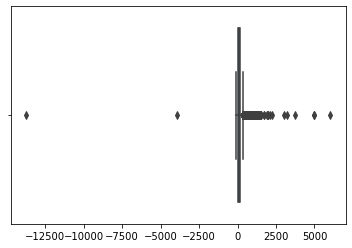

In [25]:
# ¿Entre qué valores oscilan los precios de unidad por producto?

# Es fundamental saber esto, ya que a pesar de que se intentó averiguar, se desconoce la moneda en que 
# están ingresados los montos. Esto es crítico, ya que por ejemplo no son lo mismo 20 dólares 
# estadounidenses que 20 pesos argentinos.

# Incluso, hasta cabe la posibilidad de que los precios no estén estandarizados a una sola moneda, sino que se
# hayan anotado en bruto según la moneda de la ciudad donde se realizó la venta.

sns.boxplot(x = (df_sales201314["Sales"] / df_sales201314["Sales Qty"]).round(2))

Si bien seaborn advierte sobre un valor erróneo, desde un punto de vista informático, de todas formas puede notarse que hay outliers que claramente corresponden a valores ingresados incorrectamente, por cuanto no tiene sentido tener precios por unidad negativos. Se eliminarán dichos valores en la siguiente sección y se realizará este boxplot nuevamente.

Por otra parte, dado que los años 2013 y 2014 están combinados en un mismo dataset, convendría ver la distribución de observaciones para cada año.

In [26]:
# Dataset dividido por año: 2013

df_sales201314[df_sales201314["Date"].dt.year == 2013]

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
162,308,-119.61,10014495,2013-01-01,-225.4118,2013-01-01,118961,Bravo Canned Yams,10642,-105.80,215786,-,-225.41,-2,161
163,318,0.12,10020448,2013-01-01,0.3571,2013-01-01,119206,Urban Large Brown Eggs,10389,0.24,216680,-,0.36,1,150
164,319,0.30,10020448,2013-01-01,0.8525,2013-01-01,119206,Moms Sliced Chicken,10387,0.55,216680,-,0.85,1,150
165,320,0.42,10024248,2013-01-01,1.3242,2013-01-01,119316,Best Choice Beef Jerky,10238,0.90,216767,-,1.32,1,113
166,321,0.53,10022750,2013-01-01,1.5421,2013-01-01,119301,Best Choice Mini Donuts,10237,1.01,216712,-,1.54,1,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60017,110405,7950.28,10012226,2013-12-31,10573.8220,2013-12-31,130482,High Top Golden Delcious Apples,10197,2623.54,224194,-,10573.82,140,184
60018,110406,8993.84,10009907,2013-12-31,17174.7600,2013-12-31,130491,Better Fancy Canned Sardines,10347,8180.92,224628,-,17174.76,20,167
60019,110407,12813.33,10009606,2013-12-31,23196.0000,2013-12-31,130442,Bravo Large Canned Shrimp,10654,10382.67,222187,-,23196.00,48,118
60020,110408,13872.49,10026348,2013-12-31,28822.5000,2013-12-31,130437,Best Choice Avocado Dip,10233,14950.01,223971,-,28822.50,540,105


In [27]:
# Dataset dividido por año: 2014

df_sales201314[df_sales201314["Date"].dt.year == 2014]

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
0,126,-521.96,10009653,2014-01-01,-888.5200,2014-01-01,218966,Moms Sliced Turkey,10384,-393.22,315792,-,-915.18,-2,182
1,127,-72.18,10026868,2014-01-01,-130.1370,2014-01-01,218963,Moms Corned Beef,10383,-61.86,315789,-,-134.04,-1,157
2,128,-21.33,10021297,2014-01-01,-11.8817,2014-01-01,218964,Better Fancy Canned Oysters,10346,9.09,315790,-,-12.24,-1,130
3,149,0.11,10025302,2014-01-01,0.3464,2014-01-01,219403,Best Choice Sesame Crackers,10241,0.25,316782,-,0.36,1,108
4,150,0.09,10019909,2014-01-01,0.7142,2014-01-01,219541,Blue Medal Large Brown Eggs,10078,0.64,317041,-,0.73,2,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37424,60554,3422.87,10022167,2014-06-26,3163.4064,2014-06-26,206776,Good Chablis Wine,10269,-164.56,302480,-,3258.31,168,154
37425,60555,1946.56,10022167,2014-06-26,3675.8700,2014-06-26,206773,Washington Orange Juice,10008,1839.59,302005,-,3786.15,100,154
37426,60556,4845.23,10027119,2014-06-26,8696.0000,2014-06-26,206780,Carlson Head Cheese,10362,4111.65,304144,-,8956.88,16,109
37427,60557,6494.56,10025024,2014-06-26,10800.1900,2014-06-26,206898,American Corned Beef,11247,4629.64,306020,-,11124.20,50,142


Nótese que para el año 2014, sólo hay registros hasta el día 26 de Junio. Como consecuencia, la cantidad de observaciones está reducida a la mitad, en comparación con las de 2013, lo cual es coherente porque ya no hay más para la segunda mitad de ese año.

### Data Cleaning

In [28]:
# Borrar "Invoice Date", "%KEY" y "Promised Delivery Date". No aportan nueva información.

df_sales201314.drop(["%KEY", "Invoice Date", "Promised Delivery Date"],axis = 1, inplace = True)
df_sales201314.columns

Index(['Cost', 'Customer Number', 'Date', 'GrossSales', 'Invoice Number',
       'Item Desc', 'Item Number', 'Margin', 'Order Number', 'Sales',
       'Sales Qty', 'Sales Rep Number'],
      dtype='object')

In [29]:
# Las columnas "Invoice Number", "Order Number" y "Sales Rep Number" no serán utilizadas.

df_sales201314.drop(["Invoice Number", "Order Number", "Sales Rep Number"],axis = 1, inplace = True)
df_sales201314.columns

Index(['Cost', 'Customer Number', 'Date', 'GrossSales', 'Item Desc',
       'Item Number', 'Margin', 'Sales', 'Sales Qty'],
      dtype='object')

In [30]:
# Reordenar las columnas que quedan: "Date", "Item Number", "Item Desc", "Cost", "Margin", "Sales", "GrossSales",
# "Sales Qty", "Customer Number", "Sales Rep Number", "Invoice Number", "Order Number"

df_sales201314 = df_sales201314.reindex(columns = ["Date", "Item Number", "Item Desc", 
                           "Cost", "Margin", "Sales", "GrossSales", 
                           "Sales Qty", "Customer Number"])
df_sales201314.head()

,Date,Item Number,Item Desc,Cost,Margin,Sales,GrossSales,Sales Qty,Customer Number
0,2014-01-01,10384,Moms Sliced Turkey,-521.96,-393.22,-915.18,-888.5200,-2,10009653
1,2014-01-01,10383,Moms Corned Beef,-72.18,-61.86,-134.04,-130.1370,-1,10026868
2,2014-01-01,10346,Better Fancy Canned Oysters,-21.33,9.09,-12.24,-11.8817,-1,10021297
3,2014-01-01,10241,Best Choice Sesame Crackers,0.11,0.25,0.36,0.3464,1,10025302
4,2014-01-01,10078,Blue Medal Large Brown Eggs,0.09,0.64,0.73,0.7142,2,10019909


Quedó claro que hay varias columnas con valores negativos que deberán ser investigadas.
Se dejó constancia de las mismas por si se desearan exploraciones ulteriores.
Dado que los datasets no fueron acompañados con descripciones de cada columna harán
falta averiguaciones en ese sentido también.

Para el presente análisis sólo competen la columna "Sales" y "Sales Qty", que serán usadas 
para las visualizaciones. Por lo tanto, las observaciones con valores negativos de esas columnas serán eliminadas, 
ya que ante un dataset de aprox. 60000 observaciones esas 3536 observaciones anormales (1767 de "Sales" y
1769 de "Sales Qty" no constituyen un inconveniente crítico.

Inclusive, está la posibilidad de que esas observaciones compartan valores negativos en las dos columnas, por lo que el número total de observaciones eliminadas podría hasta ser mucho menor.

In [31]:
# Se comenzará borrando las de "Sales Qty":

df_sales201314.drop(negative_salesqty, inplace = True)
df_sales201314.describe()

,Item Number,Cost,Margin,Sales,GrossSales,Sales Qty,Customer Number
count,58253.000000,58253.000000,58253.000000,58253.000000,58253.000000,58253.000000,5.825300e+04
mean,10511.498326,643.418416,478.984700,1122.882422,1112.367559,18.805195,1.001780e+07
std,292.946140,6349.946890,4017.964166,10238.878901,10125.344028,288.362285,7.607861e+03
min,10001.000000,0.000000,-13749.600000,-13749.600000,-13749.600000,1.000000,1.000000e+07
25%,10266.000000,13.840000,18.620000,37.050000,36.591000,1.000000,1.001272e+07
50%,10522.000000,55.710000,54.140000,117.610000,116.838700,1.000000,1.002019e+07
75%,10797.000000,183.020000,147.790000,336.910000,333.554500,3.000000,1.002425e+07
max,11971.000000,366576.000000,202083.200000,555376.000000,539200.000000,16000.000000,1.002758e+07


In [32]:
# Ahora hay que recalcular los índices de las columnas con valores negativos de "Sales":

negative_sales = df_sales201314[df_sales201314["Sales"] <= 0].index
negative_sales

Int64Index([26108, 35358, 47698, 52884], dtype='int64')

Efectivamente, la gran mayoría de observaciones con valores negativos tenían ambas columnas
con dichas características. Sólo quedaron cuatro con valores negativos exclusivamente en "Sales".

In [33]:
# Borrando observaciones negativas de "Sales":

df_sales201314.drop(negative_sales, inplace = True)
df_sales201314.describe()

,Item Number,Cost,Margin,Sales,GrossSales,Sales Qty,Customer Number
count,58249.000000,58249.000000,58249.000000,58249.000000,58249.000000,58249.000000,5.824900e+04
mean,10511.501605,643.462600,479.323288,1123.265227,1112.749642,18.806417,1.001780e+07
std,292.941989,6350.162679,4017.627066,10239.021357,10125.480639,288.372148,7.607939e+03
min,10001.000000,0.000000,-3673.680000,0.030000,0.027400,1.000000,1.000000e+07
25%,10266.000000,13.840000,18.630000,37.080000,36.591000,1.000000,1.001272e+07
50%,10522.000000,55.710000,54.140000,117.650000,116.838700,1.000000,1.002019e+07
75%,10797.000000,183.020000,147.810000,336.950000,333.554500,3.000000,1.002425e+07
max,11971.000000,366576.000000,202083.200000,555376.000000,539200.000000,16000.000000,1.002758e+07


Antes de volver a hacer el boxplot de la sección previa, es necesario lidiar con los problemas de la columna "Sale":

- 40158 observaciones donde "GrossSale" y "Sale" tienen los mismos valores.
- 17726 observaciones de "Sale" con valores más grandes que "GrossSale", cuando debería ser al revés.

Tras el borrado previo, ¿cuántas columnas quedaron correctamente computadas, donde "GrossSale" es mayor a "Sale"?

In [34]:
(df_sales201314["GrossSales"].round(2) > df_sales201314["Sales"].round(2)).sum()

978

Considerando la disposición actual, conviene renombrar "Sales" como "GrossSales" y viceversa:

In [35]:
df_sales201314.rename(columns={"Sales": "GrossSales", "GrossSales": "Sales"}, inplace=True)

df_sales201314 = df_sales201314.reindex(columns = ["Date", "Item Number", "Item Desc", 
                           "Cost", "Margin", "Sales", "GrossSales", 
                           "Sales Qty", "Customer Number"])
df_sales201314.describe()

# Las columnas quedaron debidamente cambiadas.

,Item Number,Cost,Margin,Sales,GrossSales,Sales Qty,Customer Number
count,58249.000000,58249.000000,58249.000000,58249.000000,58249.000000,58249.000000,5.824900e+04
mean,10511.501605,643.462600,479.323288,1112.749642,1123.265227,18.806417,1.001780e+07
std,292.941989,6350.162679,4017.627066,10125.480639,10239.021357,288.372148,7.607939e+03
min,10001.000000,0.000000,-3673.680000,0.027400,0.030000,1.000000,1.000000e+07
25%,10266.000000,13.840000,18.630000,36.591000,37.080000,1.000000,1.001272e+07
50%,10522.000000,55.710000,54.140000,116.838700,117.650000,1.000000,1.002019e+07
75%,10797.000000,183.020000,147.810000,333.554500,336.950000,3.000000,1.002425e+07
max,11971.000000,366576.000000,202083.200000,539200.000000,555376.000000,16000.000000,1.002758e+07


In [36]:
# Ahora, ¿cuántas columnas marcan correctamente un "GrossSales" superior a "Sales"?

# Rta: 18374 observaciones contra las 18383 originales. Recuérdese que se borraron observaciones, y por
# ello la discrepancia menor. Es decir, nueve de esas observaciones eran inválidas por tener valores
# negativos.

(df_sales201314["GrossSales"].round(2) > df_sales201314["Sales"].round(2)).sum()

18374

Con el cambio, ahora nos quedan las 978 columnas que sí estaban bien clasificadas, pero
que se vieron inevitablemente modificadas.

In [37]:
(df_sales201314["GrossSales"].round(2) < df_sales201314["Sales"].round(2)).sum()

978

Esta operación puede ser compleja, y apunta a conservar los datos de las 978 observaciones correctas en **ambas** columnas: se creará una copia de la columna "Sales" original como DataFrame en una variable "temp". Luego, en el dataset original y usando "mask", si la columna "Sales" tiene valores superiores a "GrossSale", se reemplazarán los valores de "Sale" por los de "GrossSale".

Ahora bien, para que "GrossSale" pueda tomar los valores de "Sales" (que fueron reemplazados), se hará una comparativa entre los valores de "Sales" del dataset con los valores de la copia "temp", y si hay discrepancia entonces la columna "GrossSale" tomará los valores "Sale" del DataFrame "temp".

De este modo, se logrará invertir los valores de ambas columnas sólo si se da a condición de que "Sales" tenga un valor superior a "GrossSale".

Tras una investigación de un par de horas, no encontré un método en "pandas" que hiciera este cambio de valores automáticamente al encontrar tal condición, por lo que recurrí a este método. 

In [38]:
temp = df_sales201314[["Sales"]].copy() # Los doble corchetes son para que se guarde como DataFrame.
temp.shape

(58249, 1)

In [39]:
df_sales201314["Sales"].mask((df_sales201314["Sales"] > df_sales201314["GrossSales"]), \
                             df_sales201314["GrossSales"], inplace=True)

df_sales201314["GrossSales"].mask((df_sales201314["Sales"] != temp["Sales"]), \
                                  temp["Sales"], inplace=True)

In [40]:
# Constatemos que salió todo bien. Esta operación debería dar como resultado 19352
# (que es 18374 que ya son correctos sumados a las 978 nuevas que acabamos de procesar)

(df_sales201314["GrossSales"].round(2) > df_sales201314["Sales"].round(2)).sum()

19352

In [41]:
del temp
df_sales201314.describe()

,Item Number,Cost,Margin,Sales,GrossSales,Sales Qty,Customer Number
count,58249.000000,58249.000000,58249.000000,58249.000000,58249.000000,58249.000000,5.824900e+04
mean,10511.501605,643.462600,479.323288,1112.067318,1123.947551,18.806417,1.001780e+07
std,292.941989,6350.162679,4017.627066,10121.596733,10242.859993,288.372148,7.607939e+03
min,10001.000000,0.000000,-3673.680000,0.027400,0.030000,1.000000,1.000000e+07
25%,10266.000000,13.840000,18.630000,36.591000,37.120000,1.000000,1.001272e+07
50%,10522.000000,55.710000,54.140000,116.688000,117.751900,1.000000,1.002019e+07
75%,10797.000000,183.020000,147.810000,333.310000,336.954900,3.000000,1.002425e+07
max,11971.000000,366576.000000,202083.200000,539200.000000,555376.000000,16000.000000,1.002758e+07


In [42]:
# Como "sanity check" adicional, ahora esta operación debiera dar 0 resultados

(df_sales201314["GrossSales"].round(2) < df_sales201314["Sales"].round(2)).sum()

0

Habiendo corregidos todos estos problemas, ya estamos en condiciones de realizar el boxplot de los precios por unidad nuevamente:

<AxesSubplot:>

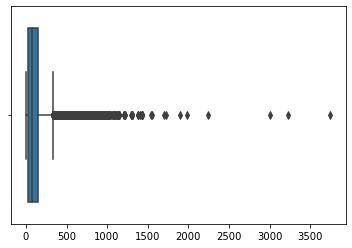

In [43]:
sns.boxplot(x = (df_sales201314["Sales"] / df_sales201314["Sales Qty"]).round(2))

In [44]:
# Número de observaciones cuyo cálculo de "Sales" sobre "Sales Qty" arrojan outliers

number_observations = []
unity_price = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 
               700, 750, 800, 850, 900, 950, 1000, 1050, 1100,
               1150, 1200, 1250, 1300, 1350]

for value in unity_price:
    number_observations.append(((df_sales201314["Sales"] / df_sales201314["Sales Qty"]) > value).sum())

print("Number of Observations:", number_observations)
print("Price per Unity:", unity_price)

Number of Observations: [10425, 9300, 7918, 6714, 6427, 5672, 5058, 4199, 3409, 2639, 1959, 1535, 1150, 640, 363, 131, 107, 67, 53, 36, 35, 29, 28, 21]
Price per Unity: [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350]


<AxesSubplot:xlabel='Price per Unity', ylabel='Number of Observations'>

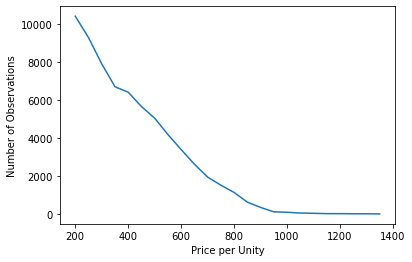

In [45]:
outliers = pd.DataFrame({"Price per Unity": unity_price, "Number of Observations": number_observations})
    
sns.lineplot(data = outliers, x = "Price per Unity", y = "Number of Observations")

En cuanto a los outliers, se tomó la determinación de eliminarlos por completo, ya que el costo de perder unas miles de observaciones es menor a tener observaciones con productos mundanos a un precio de unidad exorbitantemente erróneo. Existe el peligro de que estos outliers lleven a sobreestimar las ganancias que las visualizaciones arrojarán, lo cual constituiría un grave riesgo desde un punto de vista comercial, por lo que es menester adoptar un enfoque lo más conservador y precavido posible.

Para tomar esta decisión también se inspeccionó el dataset complementario de "Item Master", donde se constató que todos los productos son comidas y bebidas de uso diario. No hay otros productos, como ser electrodomésticos, que justificaran la existencia de estos outliers.

Por supuesto, un escenario óptimo hubiera sido disponer de la información sobre en qué moneda están los valores de venta siendo expresados, lo cual hubiera ayudado mucho para arribar a conclusiones más concretas. Sin embargo, con los razonamientos expuestos se considera que el curso de acción está justificado. 

Ahora bien, hay que considerar que, por una cuestión de equivalencia, el umbral elegido para establecer el corte de precio de unidad sea igual tanto para este dataset como para su complementario, ya que si no se estaría estableciendo un "bias" innecesario, dado que ambos datasets exponen ventas de los mismos productos comestibles.

Tras analizar ambos line plots, se concluyó que un precio de unidad máximo de $225 es el umbral que definitivamente elimina todos los outliers, mientras que a la vez evita que se remuevan observaciones válidas. La proporción de eliminaciones no resultará tan dispareja, ya que debe recordarse que en este dataset sólo hay un año completo de observaciones, no uno y medio.

In [46]:
df_sales201314 = df_sales201314[((df_sales201314["Sales"] / df_sales201314["Sales Qty"]).round(2)) < 225]
df_sales201314.shape

(48280, 9)

<AxesSubplot:>

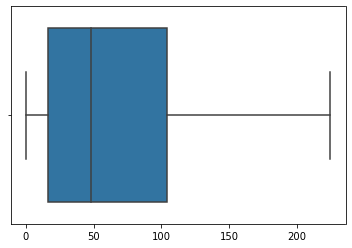

In [47]:
sns.boxplot(x = (df_sales201314["Sales"] / df_sales201314["Sales Qty"]).round(2))

In [48]:
# Asegurarse que las columnas con valores monetarios no tengan más de dos decimales

df_sales201314[["Cost", "Margin", "Sales", "GrossSales"]] = \
    df_sales201314[["Cost", "Margin", "Sales", "GrossSales"]].round(2)

In [49]:
df_sales201314.describe()

,Item Number,Cost,Margin,Sales,GrossSales,Sales Qty,Customer Number
count,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,4.828000e+04
mean,10505.616301,472.154424,331.222436,796.061444,804.511183,21.481794,1.001775e+07
std,285.689812,6667.861861,4067.426117,10491.784511,10616.455845,316.527692,7.620801e+03
min,10001.000000,0.000000,-3673.680000,0.030000,0.030000,1.000000,1.000000e+07
25%,10266.000000,10.190000,14.880000,27.552500,27.750000,1.000000,1.001272e+07
50%,10508.000000,39.730000,40.220000,84.760000,85.600000,1.000000,1.002019e+07
75%,10720.250000,94.760000,83.780000,173.490000,175.812500,3.000000,1.002425e+07
max,11971.000000,366576.000000,202083.200000,539200.000000,555376.000000,16000.000000,1.002758e+07


In [50]:
# Habiendo finalizado con la limpieza de datos, es hora de guardar los cambios en un nuevo XLSX.

df_sales201314.to_excel("cleaned_sales201314.xlsx", 
                       sheet_name = "Sales 2013-14", 
                       columns = df_sales201314.columns)